## Machine Learning CA1

Student: Charles Franklin Jahn 2020315

Lecturer: David Mcquaid

CCT College Dublin

BSc (Hons) in Computing in IT - 4nd Year

22/04/2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

C:\Users\charl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("log2.csv")

df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [3]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


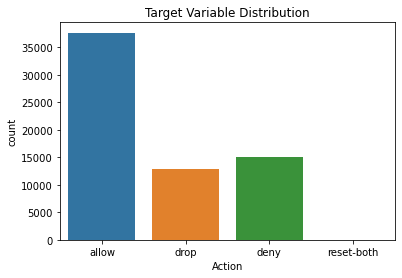

In [5]:
sns.countplot(x='Action', data=df)
plt.title('Target Variable Distribution')
plt.show()

In [6]:
# verify if there is any null value
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [7]:
le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])

# isolate features and target
X = df.drop(columns=['Action'])
y = df['Action']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [13]:
# Initiating and train using Random Forest
rf_model = RandomForestClassifier(random_state=23)
rf_model.fit(X_train, y_train)

# Checking the results of Random Forest
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

print("Random Forest - Accuracy of training:", accuracy_score(y_train, rf_pred_train))
print("Random Forest - Accuracy of testing:", accuracy_score(y_test, rf_pred_test))
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_pred_test))


Random Forest - Accuracy of training: 0.9996730031391698
Random Forest - Accuracy of testing: 0.998321464903357
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11373
           1       0.99      1.00      1.00      4474
           2       1.00      1.00      1.00      3796
           3       1.00      0.24      0.38        17

    accuracy                           1.00     19660
   macro avg       1.00      0.81      0.84     19660
weighted avg       1.00      1.00      1.00     19660



In [16]:
# Initiating and train using SVM
svm_model = SVC(random_state=23)
svm_model.fit(X_train, y_train)

# Checking the results of
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

print("SVM - Accuracy of training:", accuracy_score(y_train, svm_pred_train))
print("SVM - Accuracy of testing:", accuracy_score(y_test, svm_pred_test))
print("Classification Report on Test Set:")
print(classification_report(y_test, svm_pred_test))


SVM - Accuracy of training: 0.8922218346703872
SVM - Accuracy of testing: 0.8969481180061037
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     11373
           1       0.98      0.84      0.90      4474
           2       0.67      1.00      0.80      3796
           3       0.00      0.00      0.00        17

    accuracy                           0.90     19660
   macro avg       0.66      0.68      0.66     19660
weighted avg       0.93      0.90      0.90     19660



C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Fazendo previsões com o melhor modelo (por exemplo, Random Forest)
final_model = rf_model  # Supondo que Random Forest teve melhor desempenho

final_pred_test = final_model.predict(X_test)

print("Acurácia no conjunto de teste usando o melhor modelo:", accuracy_score(y_test, final_pred_test))
print("Diferença de precisão entre conjunto de treinamento e teste:")
print(accuracy_score(y_train, final_model.predict(X_train)) - accuracy_score(y_test, final_pred_test))


Acurácia no conjunto de teste usando o melhor modelo: 0.998321464903357
Diferença de precisão entre conjunto de treinamento e teste:
0.0013515382358127992


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular matriz de confusão para o modelo final
conf_matrix = confusion_matrix(y_test, final_pred_test)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


## References:



## GitHub:
https://github.com/CharlesCCT2020315/CA1_Machine_Learning